# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt



---
# 1. Carregar a base de dados
---
1.1 Baixando e descompactando o dataset


In [2]:
# Baixando o arquivo zip do dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

# Descompactando o arquivo
!unzip -q "UCI HAR Dataset.zip" -d "/content/"


--2025-05-12 21:33:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [     <=>            ]  58.17M  57.0MB/s    in 1.0s    

2025-05-12 21:33:21 (57.0 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]



1.2 Carregando os arquivos necessários

In [3]:
# 1. Carregar o arquivo features.txt
features = pd.read_csv('/content/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['index', 'feature'])

# 2. Carregar os dados de treino
subject_train = pd.read_csv('/content/UCI HAR Dataset/train/subject_train.txt', header=None, names=['sujeito'])
X_train = pd.read_csv('/content/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('/content/UCI HAR Dataset/train/y_train.txt', header=None, names=['atividade'])

# 3. Carregar os dados de teste
subject_test = pd.read_csv('/content/UCI HAR Dataset/test/subject_test.txt', header=None, names=['sujeito'])
X_test = pd.read_csv('/content/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
y_test = pd.read_csv('/content/UCI HAR Dataset/test/y_test.txt', header=None, names=['atividade'])


1.3 Definir as colunas de X_train e X_test de acordo com features.txt e adicionar o identificador de sujeito.

In [4]:
# Definir as colunas de X_train e X_test de acordo com features.txt
X_train.columns = features['feature']
X_test.columns = features['feature']

# Adicionar o identificador do sujeito
X_train['sujeito'] = subject_train['sujeito']
X_test['sujeito'] = subject_test['sujeito']

# Definir o índice duplo: ordem dos dados e identificador do sujeito
X_train = X_train.set_index([X_train.index, 'sujeito'])
X_test = X_test.set_index([X_test.index, 'sujeito'])


1.4 Salvar os dados em arquivos CSV

In [5]:
# Salvar as bases para facilitar a leitura na próxima etapa
X_train.to_csv('train_reduzido.csv')
X_test.to_csv('test_reduzido.csv')

print("Bases salvas com sucesso!")


Bases salvas com sucesso!


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

---
# 2. Ajustar uma árvore de decisão

---


2.1 Ajustar a árvore de decisão com número mínimo de observações por folha = 20 e utilizando apenas as 3 variáveis indicadas.

In [6]:
# Selecionar as 3 variáveis indicadas
colunas_uteis = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = X_train[colunas_uteis]
X_test_selected = X_test[colunas_uteis]

# Ajustar a árvore de decisão
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf.fit(X_train_selected, y_train.values.ravel())


DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

2.2 Calcular os ccp_alphas (valores de poda).

In [7]:
# Calcular os ccp_alphas
path = clf.cost_complexity_pruning_path(X_train_selected, y_train.values.ravel())
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])  # Somente valores positivos e únicos

# Amostrar 1 a cada 5 valores para maior velocidade
ccp_alphas_reduzidos = ccp_alphas[::5]


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.



---


# 3. Desempenho da árvore por ccp_alpha


---


3.1 Rode uma árvore para cada ccp_alpha e salve cada árvore em uma lista.

In [8]:
# Inicializar uma lista para armazenar os modelos de árvores
arvores = []

for ccp_alpha in ccp_alphas_reduzidos:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train_selected, y_train.values.ravel())
    arvores.append(clf)


3.2 Calcular a acurácia para cada árvore na base de treinamento e teste.

In [9]:
# Inicializar listas para armazenar acurácias
acuracia_treino = []
acuracia_teste = []

for clf in arvores:
    acuracia_treino.append(clf.score(X_train_selected, y_train))
    acuracia_teste.append(clf.score(X_test_selected, y_test))


3.3 Montar um gráfico da acurácia em função do ccp_alpha.

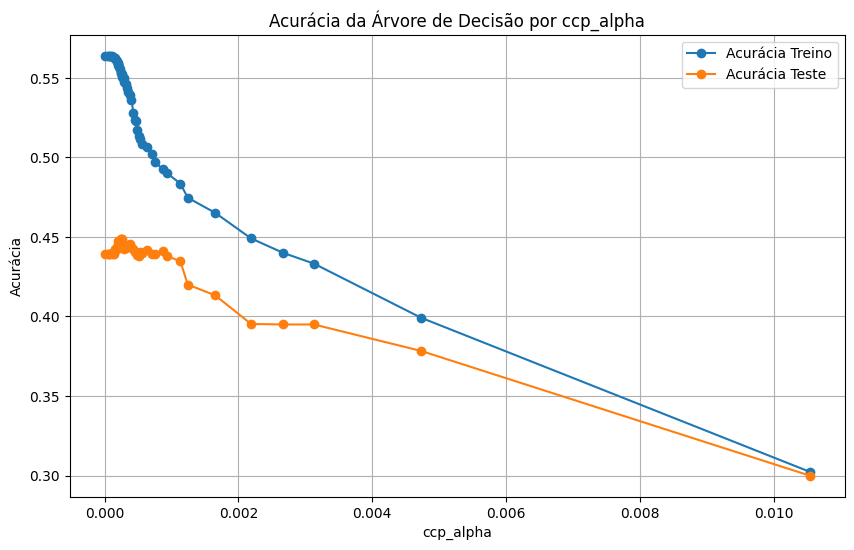

In [10]:

# Plotar as acurácias de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_reduzidos, acuracia_treino, label="Acurácia Treino", marker='o')
plt.plot(ccp_alphas_reduzidos, acuracia_teste, label="Acurácia Teste", marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia da Árvore de Decisão por ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()


3.4 Selecionar a melhor árvore com a melhor acurácia na base de teste.


In [11]:
# Encontrar o melhor ccp_alpha baseado na acurácia de teste
melhor_ccp_alpha = ccp_alphas_reduzidos[np.argmax(acuracia_teste)]
melhor_arvore = arvores[np.argmax(acuracia_teste)]

print(f"A melhor árvore foi a que utilizou o ccp_alpha = {melhor_ccp_alpha} com uma acurácia de teste de {max(acuracia_teste):.4f}")


A melhor árvore foi a que utilizou o ccp_alpha = 0.00023944476959803082 com uma acurácia de teste de 0.4486


3.5 Determinar a melhor acurácia possível com as três variáveis.

> A melhor acurácia foi determinada na etapa anterior, ao selecionar a árvore com melhor desempenho no conjunto de teste. O valor de max(acuracia_teste) é a melhor acurácia possível para as três variáveis.